In [1]:
import anndata
import scanpy as sc
import scanpy
import numpy as np
import os

BATCH_LABELS = ("nontreated", "treated")

/home/ubuntu/.local/lib/python3.6/site-packages/numba/errors.py:105: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


## Load data set

In [2]:
batches = {}

for batch in BATCH_LABELS:
    filename = "tgfb1-4-" + batch + ".h5ad"
    filename = os.path.join("write", filename)
    batches[batch] = anndata.read(filename)

batches

{'nontreated': AnnData object with n_obs × n_vars = 5019 × 7176 
     obs: 'batch', 'cellular_barcode', 'n_counts', 'percent_mito', 'S_score', 'G2M_score', 'phase', 'louvain', 'cVSMC signature'
     var: 'gene_names', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'genes_before_highly_variable', 'genes_original', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'phase_colors'
     obsm: 'X_pca', 'X_umap'
     varm: 'PCs'
     layers: 'ambiguous', 'spliced', 'unspliced',
 'treated': AnnData object with n_obs × n_vars = 7047 × 7176 
     obs: 'batch', 'cellular_barcode', 'n_counts', 'percent_mito', 'S_score', 'G2M_score', 'phase', 'louvain', 'cVSMC signature'
     var: 'gene_names', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'genes_before_highly_variable', 'genes_original', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'phase_colors'
     obsm: 'X_pca', 'X_umap'
     varm: 'PCs'
     layers: 'ambiguous', 'spliced', 'unspliced'}

## Re-compute UMAP plots

We will re-create the previously generated UMAP plots colored by UMAP clusters and some interesting genes.

creating UMAP for batch nontreated


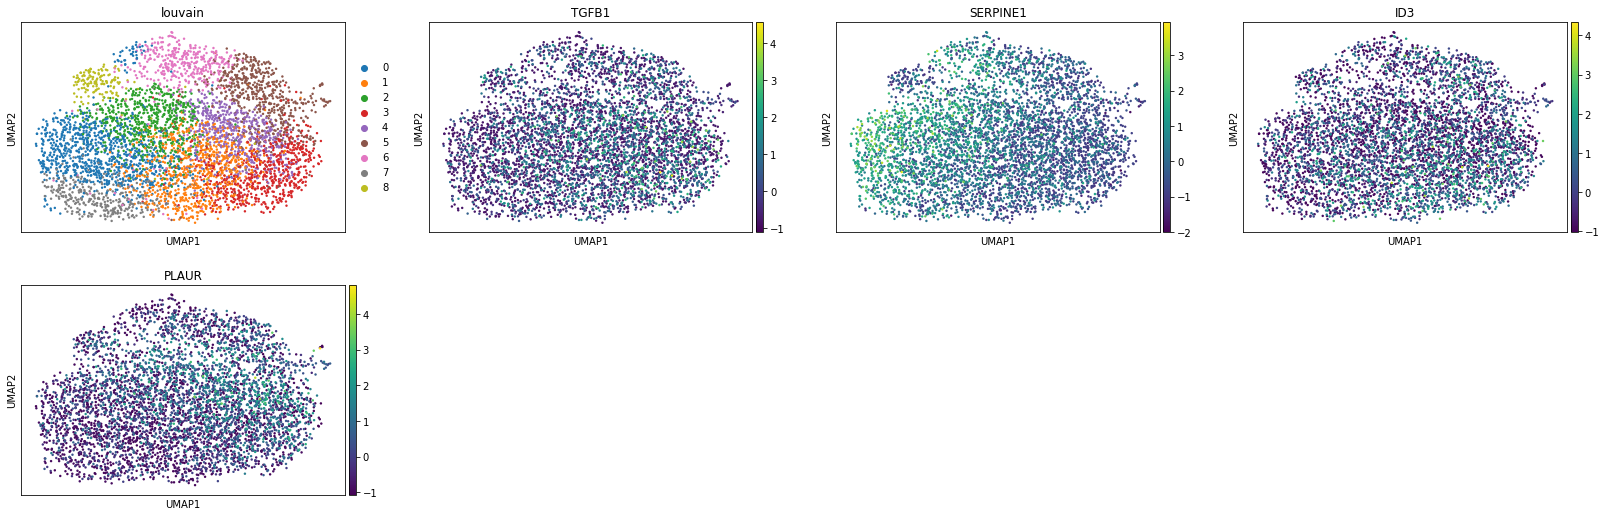

creating UMAP for batch treated


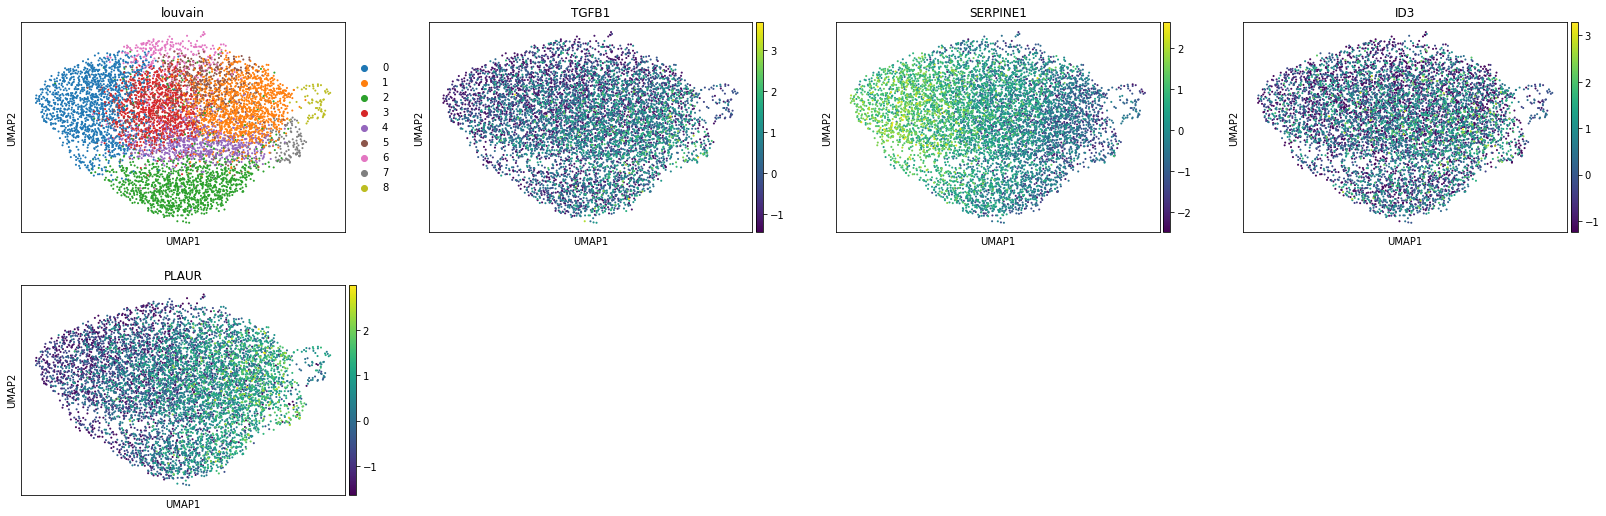

In [3]:
for batch, matrix in batches.items():
    print("creating UMAP for batch", batch)

    sc.pl.umap(matrix, color=['louvain', 'TGFB1', 'SERPINE1', 'ID3', 'PLAUR'])

## Finding marker genes per cluster

Let us compute a ranking for the highly differential genes in each cluster. For this, by default, the .raw attribute of AnnData is used in case it has been initialized before. We will use the Mann–Whitney–Wilcoxon test to compute this data.

marker genes per cluster for batch nontreated


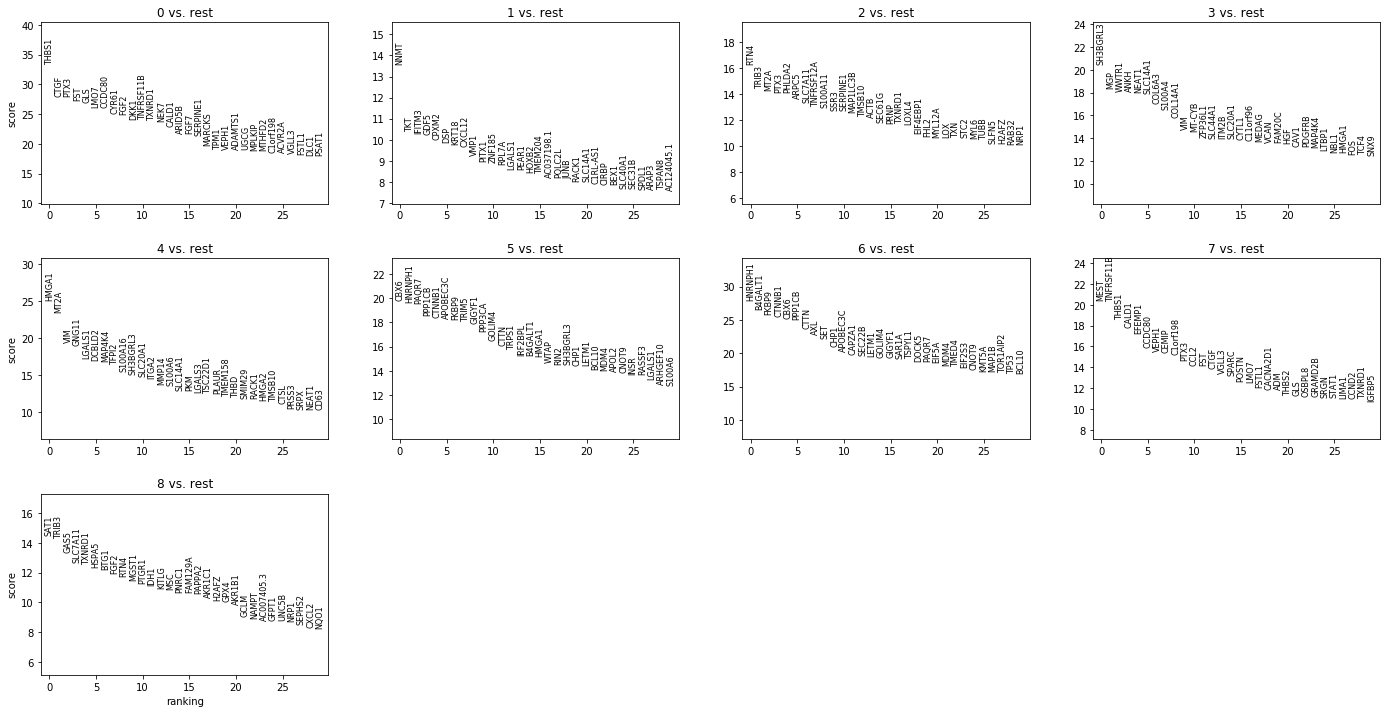

marker genes per cluster for batch treated


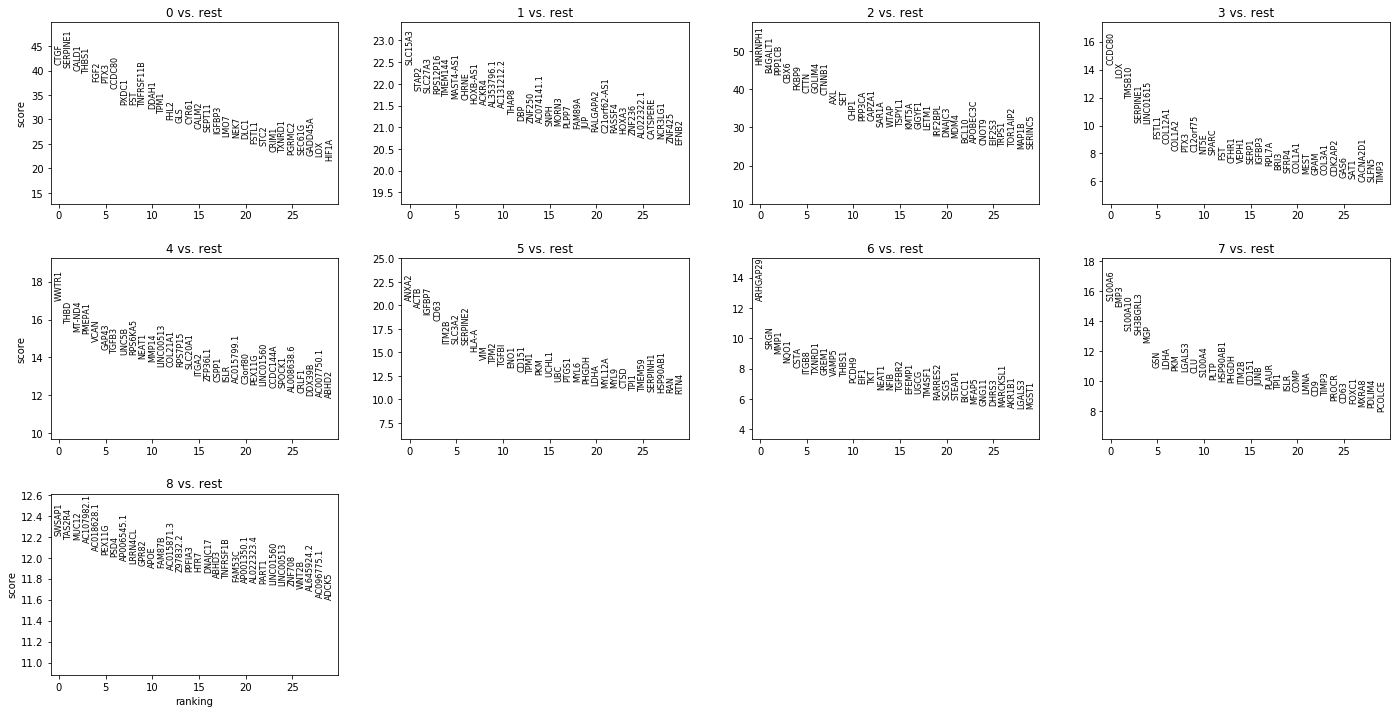

In [4]:
for batch, matrix in batches.items():
    print("marker genes per cluster for batch", batch)

    sc.tl.rank_genes_groups(matrix, 'louvain', method='wilcoxon', corr_method="benjamini-hochberg", n_genes=100)
    sc.pl.rank_genes_groups(matrix, n_genes=30, sharey=False)

## Some analysis I don't have the time to understand

TODO: go through this w/ Adam/Ange

In [7]:
def magic_analysis(matrix, cluster_no, n):
    pvals_adj = np.array(matrix.uns['rank_genes_groups']['logfoldchanges'].tolist()).T[cluster_no][:n].tolist()
    #pvals_adj = np.array(adata.uns['rank_genes_groups']['pvals_adj'].tolist()).T[cluster_no][:n].tolist()
    names = np.array(matrix.uns['rank_genes_groups']['names'].tolist()).T[cluster_no][:n].tolist()
    genes = list(zip(names, pvals_adj))
    
    print("something with genes and logged p-values in cluster")
    
    for i, j in genes:
        print(i)
    
    print("now sorting genes by pvalue")
    genes.sort(key=lambda i: i[1], reverse=True)

    print("get those with pvalue > 1")
    for i, j in genes:
        if j > 1:
            print(i, j)
            
    print("get those with pvalue < -1")
    for i, j in genes:
        if j < -1:
            print(i, j)


In [8]:
magic_analysis(batches["treated"], 7, 100)

something with genes and logged p-values in cluster
S100A6
EMP3
S100A10
SH3BGRL3
MGP
GSN
LDHA
PKM
LGALS3
CLU
S100A4
PLTP
HSP90AB1
PHGDH
ITM2B
CD151
JUNB
PLAUR
TPI1
ISLR
COMP
LMNA
CD9
TIMP3
PROCR
CD63
FOXC1
MXRA8
PDLIM4
PCOLCE
HLA-A
CRYAB
TSPAN2
SCX
ENO1
IGFBP5
PPP1R14C
CAPG
SNX9
ANKH
KDELR3
SLC3A2
HSP90AA1
PRSS3
LTBP1
PLPP7
MEDAG
DNAJA1
MORN3
ANXA2
IER2
SLC27A3
FOS
PILRB
SMIM14
CAV1
KCNN4
CDH6
FAM86C1
TMEM107
SLC15A3
ODF3B
ZSCAN2
HSPA8
PLXDC2
APCDD1L
WLS
TMEM144
RPS12P16
AL353796.1
CHRNE
CD59
WNT2
RNF227
REX1BD
SQOR
SERTAD4
MEG3
AC090517.5
SERPINF1
UBC
ZNF575
AC074141.1
ACO2
C21orf62-AS1
ATP1B3
ACKR4
MAST4-AS1
DBP
STAP2
HMGB1P21
LINC00886
SNED1
ZSCAN16
HOXB-AS1
C11orf96
TGFB1
AC131212.2
CYFIP2
SEC31B
now sorting genes by pvalue
get those with pvalue > 1
C21orf62-AS1 5.72233247756958
TMEM144 5.722330093383789
AC074141.1 5.722312927246094
CD151 5.7223076820373535
FAM86C1 5.722305774688721
ODF3B 5.722304821014404
RNF227 5.722304344177246
STAP2 5.722303867340088
PLXDC2 5.72230339050293
FOX

In [9]:
magic_analysis(batches["treated"], 8, 100)

something with genes and logged p-values in cluster
SWSAP1
TAS2R4
MUC12
AC107982.1
AC018628.1
PEX11G
PSD4
AP006545.1
LRRN4CL
GPR82
APOE
FAM87B
AC015871.3
Z97832.2
PPFIA3
HTR7
DNAJC17
ABHD3
TNFRSF1B
FAM53C
AP001350.1
AL022323.4
PART1
LINC01560
LINC00513
ZNF708
WNT2B
AL645924.2
AC096775.1
ADCK5
AC004812.2
PDGFD
MFSD4B
WDR73
NFKBID
AL008638.6
Z82217.1
AL022311.1
ABCA17P
LPAR6
AC104581.4
RPS7P15
FBXO36
FSD1L
AC124319.4
EVI2A
COL21A1
PCDHGA12
ZCCHC18
AL359694.2
SOX5
AC005070.3
AC026356.1
PCDHGB6
GPKOW
ZUP1
DRG2
POU5F2
AC015799.1
FES
AC012358.1
ANO1
MACROD1
FAT3
WFDC3
RAMAC
NINJ2
LINC00536
JCHAIN
GMDS
AC007750.1
LATS2-AS1
ZNF611
AL033543.1
AC011498.7
MILR1
ZNF713
PCSK1
ZNF595
PLEKHN1
CEP162
TRAPPC6B
PTN
LRRIQ1
TGFB3
DNAJC12
SETMAR
AC109326.1
PINX1
PLA2G4A
NTHL1
AC137932.3
ARIH2OS
AC110285.7
GAP43
OMA1
MALL
LINC01423
B4GALNT1
IL7
now sorting genes by pvalue
get those with pvalue > 1
IL7 6.704831600189209
AC015799.1 6.703657627105713
AC007750.1 6.703302383422852
PPFIA3 6.703179836273193
ANO1 6

In [10]:
magic_analysis(batches["treated"], 1, 100)

something with genes and logged p-values in cluster
SLC15A3
STAP2
SLC27A3
RPS12P16
TMEM144
MAST4-AS1
CHRNE
HOXB-AS1
ACKR4
AL353796.1
AC131212.2
THAP8
DBP
ZNF250
AC074141.1
SNPH
MORN3
PLPP7
FAM89A
JUP
RALGAPA2
C21orf62-AS1
RASSF4
HOXA3
ZNF236
AL022322.1
CATSPERE
NCR3LG1
ZNF425
EFNB2
CADM1
PIK3CD
HIC2
AC022613.3
ZNF707
ADGRG1
RACK1
PTMA
ADD3-AS1
PILRB
BMP2
ESS2
RDH13
ZKSCAN2-DT
PIF1
NMNAT2
FOCAD
AP000254.1
AC124045.1
GREM2
LRRC45
AC068888.1
AL357507.1
AC135050.7
PEX12
AC124798.1
PLAUR
RGS14
AC008280.3
SCN8A
MMACHC
FNTB
TRIM24
RNF227
ZSCAN2
AP002387.1
GMEB2
CYFIP2
DUSP4
FAM21FP
PAN2
LGALS1
IFI27
HLA-F-AS1
RNF212
NR2C1
LINC00886
RCCD1
ZNF229
DNAJC18
ZSCAN16
TPRN
ZKSCAN2
CCDC3
ZNF575
PCSK9
GNE
ODF3B
SBDSP1
QPRT
CFAP44
TP53I11
LMF1
BRPF1
CYB561D1
VAV2
TSC22D1-AS1
KCNJ8
LINC01426
ZNF143
now sorting genes by pvalue
get those with pvalue > 1
TPRN 2.005661725997925
CHRNE 2.005655527114868
ZNF229 2.005655288696289
AC135050.7 2.0056543350219727
TMEM144 2.0056538581848145
PAN2 2.005650758743286
PIK

In [11]:
magic_analysis(batches["treated"], 3, 100)

something with genes and logged p-values in cluster
CCDC80
LOX
TMSB10
SERPINE1
LINC01615
FSTL1
COL12A1
COL1A2
PTX3
C12orf75
NT5E
SPARC
FST
CFHR1
VEPH1
SERP1
IGFBP3
RPL7A
BRI3
SFRP4
COL1A1
MEST
GPAM
COL3A1
CDK2AP2
GAS6
SAT1
CACNA2D1
SLFN5
TIMP3
CDH2
MT-CO3
TMEM167A
MT2A
CYP1B1
PRNP
CDH13
HSPA5
CCND2
NEAT1
SEC61G
NRP1
FGF2
GFPT1
EPAS1
COL5A1
COL15A1
EFEMP1
MAP1LC3B
EPDR1
SPX
POLR3G
PIGB
DNAJB9
ANXA1
SNHG8
MT-ND4
AC007405.3
MAK
WDPCP
SEPHS2
BLID
DKK1
SLC7A11
NLGN4Y
AC009779.2
CDKN3
TRIM7
MICAL2
FMOD
SGCG
PCDH17
LINC01133
ZNF33B
SGMS1-AS1
MIR22HG
HEY1
AC114980.1
COL5A2
GLRX
TNFSF13B
AL357507.1
BRCA2
MROH6
RFX5
SDF2L1
ZNF19
SLC23A3
OSBPL7
SCML1
GAS8
AC139530.1
NEK7
HSPA13
VDR
IGFN1
IL17D
LINC01152
TCAIM
SCG2
now sorting genes by pvalue
get those with pvalue > 1
ZNF19 2.5464248657226562
NLGN4Y 2.546412467956543
IL17D 2.54640793800354
TMSB10 2.5464046001434326
CDKN3 2.5464046001434326
AC009779.2 2.5464043617248535
LINC01152 2.5464041233062744
IGFN1 2.5464038848876953
DKK1 2.546403408050537
LI